In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = 'data/'
sz=224

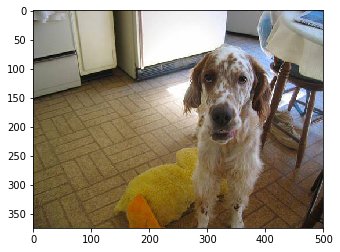

In [5]:
img = plt.imread(glob(f'{PATH}train/*.*')[1])
plt.imshow(img);

In [6]:
arch=resnet34

In [7]:
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', suffix='.jpg', tfms=tfms_from_model(arch, sz))

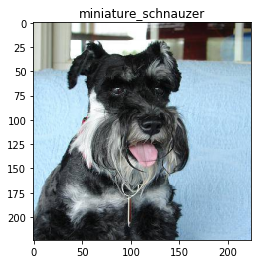

In [58]:
# plot random image in validation set and its label
im = random.randint(0,len(data.val_ds)-1)
plt.imshow(data.val_ds.denorm(data.val_ds[im][0])[0,:,:,:]);
plt.title(data.classes[data.val_y[im]]);

In [11]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      2.171882   1.103933   0.772994  
    1      1.114925   0.717871   0.826321                    
    2      0.81048    0.632945   0.834638                     



[array([0.63295]), 0.8346379645416648]

In [10]:
log_preds = learn.predict()
log_preds.shape

(2044, 120)

In [15]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
preds

array([ 19,  15,   7, ..., 109,   3,  28])

In [24]:
np.mean(preds==data.val_y)

0.8209393346379648

In [106]:
my_breeds = ['boston_bull', 'pekinese', 'golden_retriever',  'maltese_dog', 'wire-haired_fox_terrier',
       'boxer', 'doberman','standard_schnauzer', 'labrador_retriever', 'weimaraner', 'giant_schnauzer','toy_poodle',
       'shih-tzu','german_shepherd',  'rhodesian_ridgeback', 'irish_setter', 'bloodhound','miniature_schnauzer',
       'brittany_spaniel', 'border_collie', 'collie', 'malamute','chihuahua', 'saluki', 'pug', 'bull_mastiff', 
       'bernese_mountain_dog', 'american_staffordshire_terrier', 'lhasa',  'afghan_hound', 'saint_bernard', 
       'miniature_pinscher', 'irish_wolfhound', 'chow', 'staffordshire_bullterrier', 'siberian_husky', 'newfoundland', 
       'great_pyrenees','beagle', 'vizsla',  'standard_poodle', 'miniature_poodle', 'pomeranian', 'yorkshire_terrier',
       'pembroke', 'great_dane', 'french_bulldog', 'tibetan_mastiff', 'cocker_spaniel', 'rottweiler']

In [189]:
def rand_by_correct(is_correct, breeds=None): 
    if breeds is None:
        mask = ((preds == data.val_y) == is_correct)
    else:
        mask = ((preds == data.val_y) == is_correct) & (np.array([(data.classes[i] in breeds) for i in data.val_y]))
    return np.random.choice(np.where(mask)[0], 4, replace=False) 

In [159]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [160]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [161]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    labels = [data.classes[preds[x]] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=labels, figsize=(16,8))

Correctly classified


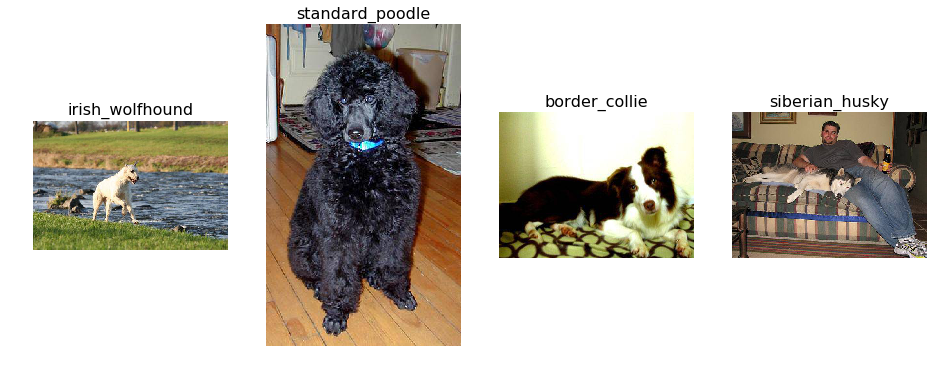

In [194]:
# a few correct labels at random
plot_val_with_title(rand_by_correct(True, my_breeds), "Correctly classified")

Incorrectly classified


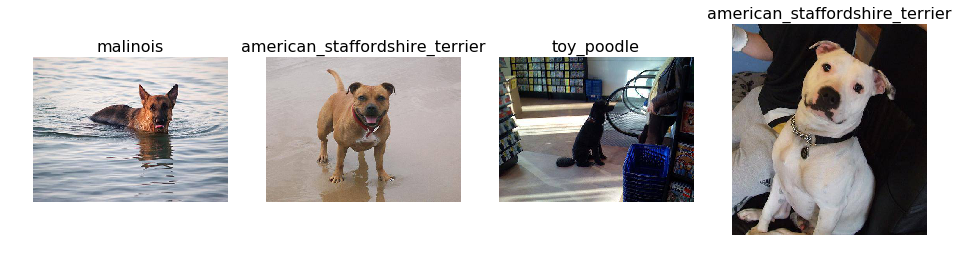

In [188]:
# a few incorrect labels at random
plot_val_with_title(rand_by_correct(False, my_breeds), "Incorrectly classified")